Dataset shape: (503, 8)
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

📊 Model Evaluation Metrics:
Mea

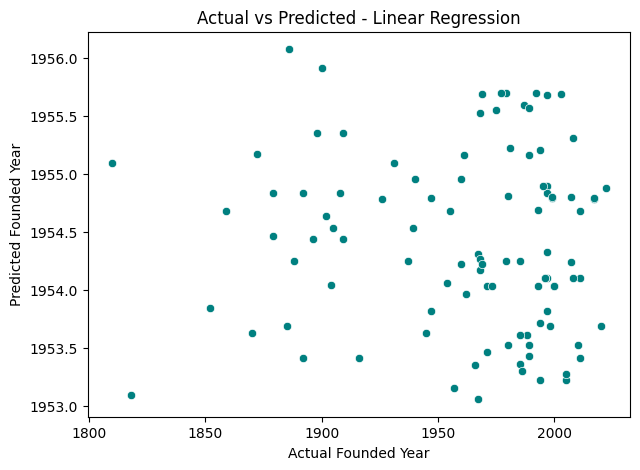

In [ ]:
#PAYAL CHATTERJEE
#22BDS0226

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print(df.head())

# Step 3: Data preprocessing
df = df[['GICS Sector', 'GICS Sub-Industry', 'Founded']].dropna()

# 🔹 Clean 'Founded' column to extract numeric year only
# Example: "1928 (2011)" → 1928
df['Founded'] = df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

# Remove any rows that still have NaN after cleaning
df = df.dropna(subset=['Founded'])

# 🔹 Encode categorical columns
le_sector = LabelEncoder()
le_sub = LabelEncoder()

df['Sector_encoded'] = le_sector.fit_transform(df['GICS Sector'])
df['SubIndustry_encoded'] = le_sub.fit_transform(df['GICS Sub-Industry'])

# Step 4: Define features (X) and target (y)
X = df[['Sector_encoded', 'SubIndustry_encoded']]
y = df['Founded']

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (Accuracy): {r2:.4f}")

# Step 9: Visualization — Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual Founded Year")
plt.ylabel("Predicted Founded Year")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()


Dataset Loaded Successfully!

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

Encoded Dataset Sample:
 

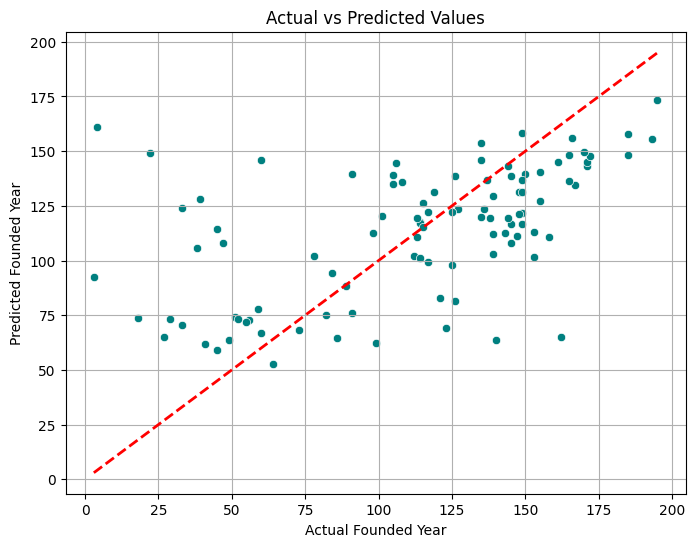

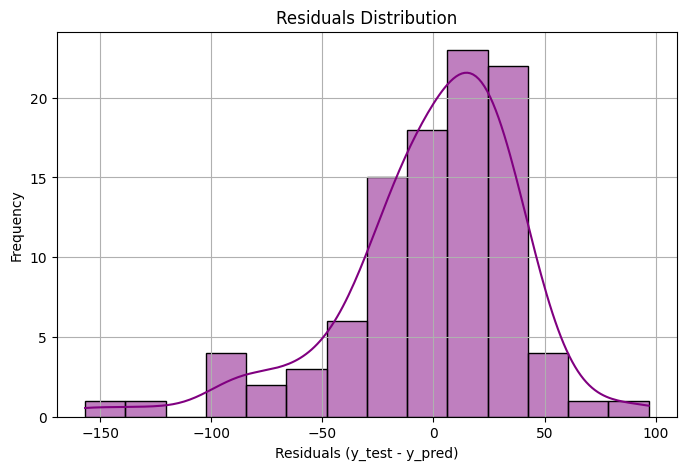

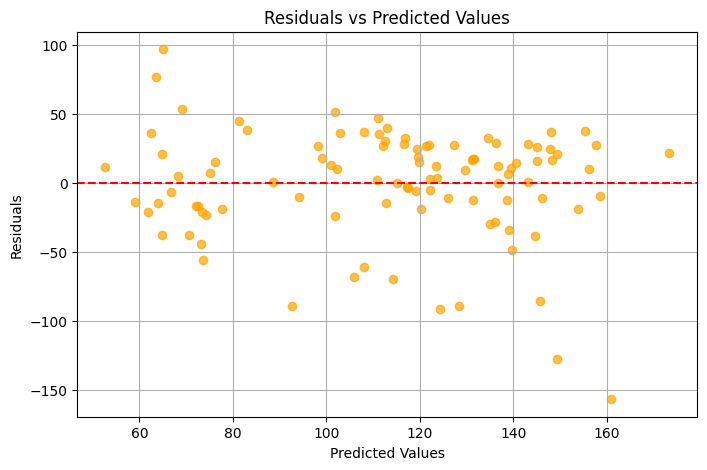

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)
print("Dataset Loaded Successfully!\n")
print(df.head())

# Step 3: Handle Missing Values
df = df.dropna()

# Step 4: Encode Categorical Columns
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

print("\nEncoded Dataset Sample:")
print(df.head())

# Step 5: Define Features and Target
# Let's assume we want to predict "Founded" year (a numeric column)
X = df.drop('Founded', axis=1)
y = df['Founded']

# Step 6: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 9: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 10: Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Step 11: Print Metrics
print("\n Linear Regression Performance Metrics:")
print(f"R² Score  : {r2:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"MAE       : {mae:.4f}")
print(f"RMSE      : {rmse:.4f}")

# Step 12: Visualization - Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Founded Year')
plt.ylabel('Predicted Founded Year')
plt.grid(True)
plt.show()

# Step 13: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (y_test - y_pred)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 14: Scatter Plot of Residuals
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color='orange', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
